In [8]:
import pandas as pd

In [9]:
path_in =r'D:\Projects\Pr\3556.10\hfreq.txt'

Eerst lezen we het bestand in met pandas

In [10]:
df = pd.read_csv(path_in, delim_whitespace=True, skiprows=1, header=None, )
df.columns = ['waterlevel','frequency']

In [12]:
df.head()

,waterlevel,frequency
0,15.2,0.113170
1,15.3,0.100565
2,15.4,0.087885
3,15.5,0.077290
4,15.6,0.067216


In [13]:
#df.to_json(r'D:\Projects\RO\HydroAsAService//waterlevel_returnperiod.json')

Eerst kijken of we het kunnen plotten met de Altair module, zie voor voorbeelden: https://github.com/jakevdp/altair-examples. De module is gebasseerd op een Vega-Lite JSON object, waarbij sommige elementen voor ingevuld worden op basis van de data. Je datatype, aangegeven met `:Q` (quantitative) zou je weg kunnen laten bijvoorbeeld

In [14]:
from altair import *

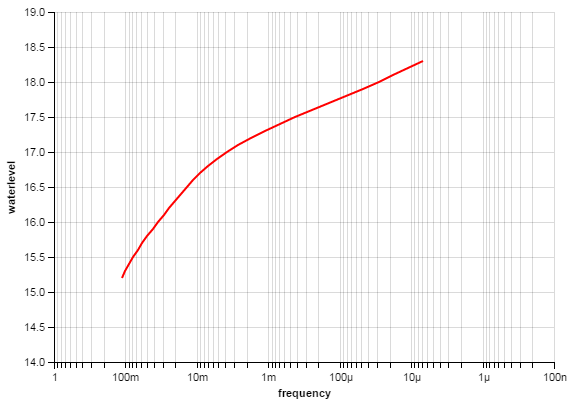

In [16]:
Chart(df).mark_line().encode(
    y=Y('waterlevel',scale=Scale(domain=[14,19])),
    x=X('frequency',scale=Scale(type='log', domain=[0.1,1e-7])),
    color=Color(value="red")    
)

OK, dat lukt. Altair is een versimpelling van het Vega-Lite JSON object. Maar vanuit Jupyer kan je ook in een keer een VegaLite object kunnen aanmaken. De beschrijving van je grafiek wordt wel iets groter, maar het verduidelijkt dingen misschien wat meer

In [17]:
from vega import VegaLite

En nu kunnen we het object gebruiken om bijvoorbeeld een Bokeh plot te maken. Indien nodig inclusief binding functies. Deze functies moeten voor de webomgeving in principe gemaakt worden door de ontwikkelaars, maar wanneer dit VegaLite JSON object is aangemaakt door collega x, dan kan collega y het gebruiken in zijn favoriete plotting library

In [18]:
VL = {
  "width": 400,
  "height": 400,
  "mark": "line",
  "encoding": {
    "x": {
      "field": "frequency",
      "type": "quantitative",      
      "scale": {
        "domain": [0.1,1e-7],
        "type": "log"
      }

    },
    "y": {
      "field": "waterlevel",
      "type": "quantitative",
      "scale": {"domain":[14,19]}
    },
    "color": {"value": "#000000"}
  }
}

In [19]:
import bokeh
from bokeh.io import output_notebook, show
from bokeh.models import Range1d
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [20]:
VL_chart_type = VL["mark"]
VL_x_scale_domain = VL["encoding"]["x"]["scale"]["domain"]
VL_y_scale_domain = VL["encoding"]["y"]["scale"]["domain"]
VL_x_scale_type = VL["encoding"]["x"]["scale"]["type"]
VL_width = VL["width"]
VL_height = VL["height"]
VL_x_field = VL["encoding"]["x"]["field"]
VL_y_field = VL["encoding"]["y"]["field"]
VL_color = VL["encoding"]["color"]["value"]

In [21]:
print ('x_scale_domain:',VL_x_scale_domain)
print ('color', VL_color)

x_scale_domain: [0.1, 1e-07]
color #000000


In [22]:
# maak een plot

In [23]:
# create a new plot (with a title) using figure
p = figure(plot_width=VL_width, plot_height=VL_height,x_axis_type=VL_x_scale_type)

if VL_chart_type == 'line':
    # add a line renderer
    p.line(df[VL_x_field], df[VL_y_field], color=VL_color)
    p.y_range = Range1d(VL_y_scale_domain[0], VL_y_scale_domain[1])
    p.x_range = Range1d(VL_x_scale_domain[0], VL_x_scale_domain[1])

show(p) # show the results

In [ ]:
# permanente wijzigingen doorvoeren in het json object

In [24]:
VL["mark"] = 'point'
VL["encoding"]["x"]["scale"]["domain"][0] = 1
VL["encoding"]["color"]["value"] = 'red'

VL_chart_type = VL["mark"]
VL_x_scale_domain = VL["encoding"]["x"]["scale"]["domain"]
VL_color = VL["encoding"]["color"]["value"]

VL

{'encoding': {'color': {'value': 'red'},
  'x': {'field': 'frequency',
   'scale': {'domain': [1, 1e-07], 'type': 'log'},
   'type': 'quantitative'},
  'y': {'field': 'waterlevel',
   'scale': {'domain': [14, 19]},
   'type': 'quantitative'}},
 'height': 400,
 'mark': 'point',
 'width': 400}

In [25]:
# create a new plot 
p = figure(plot_width=VL_width, plot_height=VL_height,x_axis_type=VL_x_scale_type)

if VL_chart_type == 'line':
    # add a line renderer
    p.line(df[VL_x_field], df[VL_y_field], color=VL_color)
    p.y_range = Range1d(VL_y_scale_domain[0], VL_y_scale_domain[1])
    p.x_range = Range1d(VL_x_scale_domain[0], VL_x_scale_domain[1])

if VL_chart_type == 'point':
    # add a line renderer
    p.scatter(df[VL_x_field], df[VL_y_field], color=VL_color)
    p.y_range = Range1d(VL_y_scale_domain[0], VL_y_scale_domain[1])
    p.x_range = Range1d(VL_x_scale_domain[0], VL_x_scale_domain[1])    

show(p) # show the results

In [26]:
# en sinds de wijzigingen in het json object is aangemaakt, moet die het ook weer doen in de plotting library van vegalite

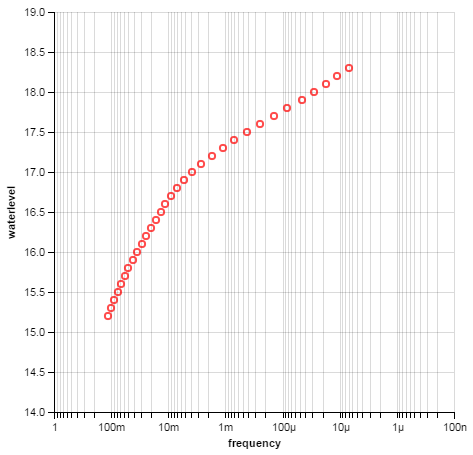

In [27]:
VegaLite(VL, df)